In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from spice import SpiceEstimator, SpiceDataset, SpiceConfig, BaseRNN, Agent, plot_session, csv_to_dataset
from weinhardt2025.utils.bandits import BanditsGeneral, create_dataset
from weinhardt2025.benchmarking.benchmarking_qlearning import QLearning

In [ ]:
dataset = csv_to_dataset(file='weinhardt2025/data/synthetic/synthetic_256p_0_0.csv', additional_inputs=['beta_reward', 'beta_choice', 'alpha_reward', 'alpha_penalty', 'alpha_choice', 'forget_rate'])

In [7]:
agent = Agent(QLearning(
    n_actions=2,
    n_participants=1,
    beta_reward=dataset.xs[0, 0, 4].item(),
    alpha_reward=dataset.xs[0, 0, 6].item(),
    alpha_penalty=dataset.xs[0, 0, 7].item(),
    forget_rate=dataset.xs[0, 0, 9].item(),
    beta_choice=dataset.xs[0, 0, 5].item(),
    alpha_choice=dataset.xs[0, 0, 8].item(),
), use_sindy=True, deterministic=False)

In [40]:
agent = Agent(QLearning(
    n_actions=2,
    n_participants=1,
    beta_reward=3.,
    alpha_reward=0.5,
    alpha_penalty=0.5,
    forget_rate=0.,
    beta_choice=1.,
    alpha_choice=0.5,
), use_sindy=True, deterministic=False)

In [8]:
env = BanditsGeneral(
    n_arms=2,
    init_reward_prob=(0.7, 0.3),
    hazard_rate=0.1,
)

In [9]:
dataset = create_dataset(
    agent,
    env,
    n_trials=100,
    n_sessions=1,
)[0]

Creating dataset...


100%|██████████| 1/1 [00:00<00:00, 12.94it/s]


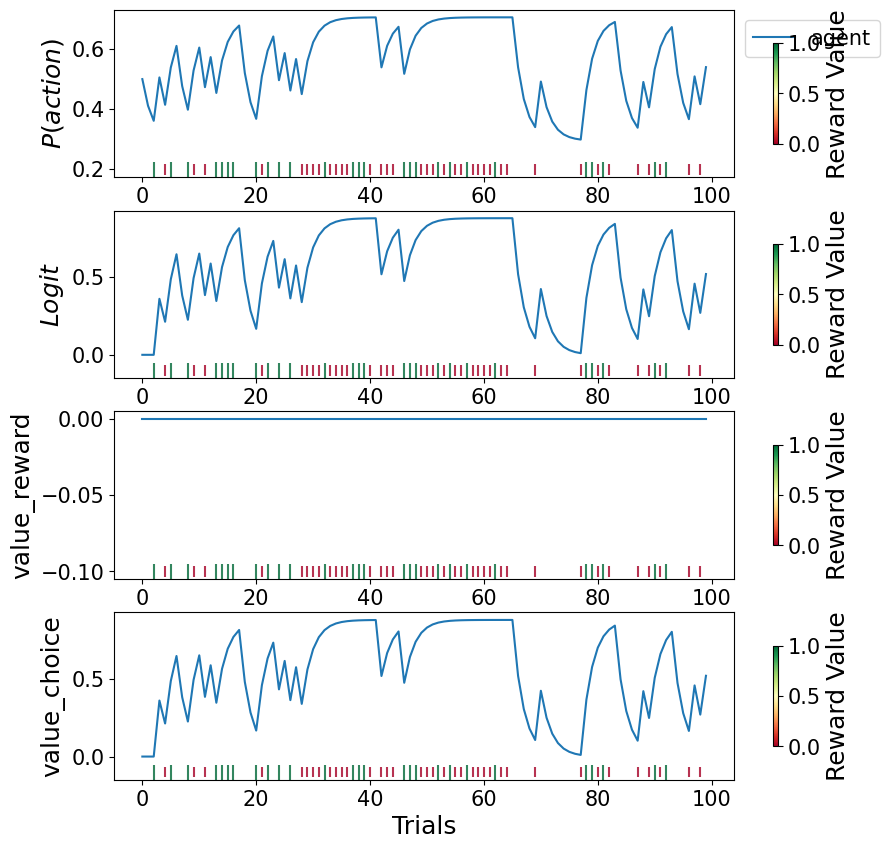

In [10]:
fig, axs = plot_session({'agent': agent}, dataset.xs[0], signals_to_plot=['value_reward', 'value_choice'])

In [2]:
dataset = csv_to_dataset(file='weinhardt2025/data/synthetic/synthetic_256p_0_0.csv')

In [5]:
dataset.xs[:12, 0, -1]

tensor([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.])